In [1]:
import os
import random

import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root
from utils.config import random_sample,seed

In [2]:
model_type="bertopic"
model_name="BERTopic"
experiment="embedding"
embedding_model = "nb-sbert-base"
data_type="np_mini_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)



In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
from sentence_transformers import SentenceTransformer

emb_model = SentenceTransformer("NbAiLab/nb-sbert-base")


In [5]:
topic_model = BERTopic(embedding_model=emb_model)
try:
    topic_model = topic_model.load(file_path)
except:
    print("correctly")
    topics,probs = topic_model.fit_transform(documents=new_data)

In [6]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1   1235  -1_fremskrittspartiet_regjeringen_norge_statsr...
1       0    291                    0_skolen_skole_utdanning_elever
2       1    240           1_regjeringen_gasskraftverk_energi_norge
3       2    219                 2_kr_jernbane_jernbanen_statsråden
4       3    149  3_arbeiderpartiet_fremskrittspartiet_høyre_kri...
5       4    137                      4_landbruk_mat_landbruket_dyr
6       5    127     5_pasienter_helseministeren_behandling_sykehus
7       6    102            6_kommunene_kommunane_kommuner_kommunar
8       7     88                   7_arbeidslivet_folk_arbeid_uføre
9       8     76                    8_barn_barnevernet_barna_barnet
10      9     60       9_politiet_justisministeren_politi_politiets
11     10     59  10_økonomi_finansministeren_handlingsregelen_bank
12     11     58              11_barentshavet_fisk_fisken_villaksen
13     12     57  12_skatt_formuesskatten_skattelettelser_finans...
14     13     56         13_asylsøkere_norge_diskriminering_opphold
15     14     45                 14_staten_eier_eierskapet_eierskap
16     15     45         15_forsvaret_forsvarets_statsråden_forsvar
17     16     41         16_stortinget_saken_statsråden_mattilsynet
18     17     39  17_motsegner_miljøvernministeren_motsegn_stats...
19     18     38             18_kultur_kulturelle_skolesekken_kunst
20     19     32                  19_skip_hurtigruta_gods_skipsfart
21     20     31          20_barn_fosterhjem_barnehagene_barnehager
22     21     31             21_innkjøp_regelverket_stortinget_kofa
23     22     25                     22_forslag_nr_forslaget_stemme
24     23     25                  23_eu_eøsavtalen_norge_direktivet
25     24     23                     24_bistand_fattige_verden_land
26     25     22  25_husbanken_boliger_boligmarkedet_boligbyggingen
27     26     20         26_nrk_kulturministeren_statsråden_monopol
28     27     20            27_fengsel_innsatte_fengslene_fengselet
29     28     19         28_afghanistan_militære_demokrati_soldater
30     29     18                         29_etiopia_land_usa_europa
31     30     17  30_konkurranse_konkurransetilsynet_posten_vurd...
32     31     16        31_pass_schengenområdet_undersøkes_reisende
33     32     16              32_kvinner_likestilling_menn_likelønn
34     33     16  33_vegne_grunnlovsforslag_representantforslag_...
35     34     14             34_nato_natos_tryggingsrådet_atomvåpen
36     35     14                35_irak_utenriksministeren_land_usa
37     36     13                36_kirken_kirke_kirkens_statskirken
38     37     12                       37_mill_kr_domstolene_penger
39     38     12       38_fn_statsministeren_erklæringa_eosutvalget
40     39     11  39_personvernet_datatilsynet_personvern_datala...
41     40     11    40_penger_folketrygdfondet_revidert_regjeringen
42     41     10           41_barnet_kontantstøtten_foreldrene_barn
43     42     10                             42_alkohol_øl_vin_1991

In [7]:
topics = topic_model.get_topics()

In [8]:
topic_model.visualize_topics()

In [9]:
topic_model.save(file_path)

In [10]:
topics

{-1: [('fremskrittspartiet', 0.00956745830900481),
  ('regjeringen', 0.00927249911681385),
  ('norge', 0.00923325362866239),
  ('statsråden', 0.008898613850540641),
  ('gjelder', 0.008299218278522704),
  ('stortinget', 0.008216409554707507),
  ('representanten', 0.007920608880259689),
  ('sv', 0.007797772243695301),
  ('land', 0.00773657344740241),
  ('forslag', 0.007441917254438771)],
 0: [('skolen', 0.024800030053744728),
  ('skole', 0.01769304890318134),
  ('utdanning', 0.01763750047510562),
  ('elever', 0.01672096603266593),
  ('elevene', 0.015429092429596395),
  ('lærere', 0.012729814266581645),
  ('forskning', 0.012646617357070011),
  ('videregående', 0.011039580146226458),
  ('skoler', 0.010369146913742074),
  ('opplæring', 0.009987822957811846)],
 1: [('regjeringen', 0.015672225377635133),
  ('gasskraftverk', 0.015426427388204376),
  ('energi', 0.015131181570526389),
  ('norge', 0.013567649729428099),
  ('kraft', 0.01298913621284874),
  ('olje', 0.010907645361010401),
  ('gass'

In [11]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [12]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [13]:
print(formatted_topics)

[{'skolen': 0.024800030053744728, 'skole': 0.01769304890318134, 'utdanning': 0.01763750047510562, 'elever': 0.01672096603266593, 'elevene': 0.015429092429596395, 'lærere': 0.012729814266581645, 'forskning': 0.012646617357070011, 'videregående': 0.011039580146226458, 'skoler': 0.010369146913742074, 'opplæring': 0.009987822957811846}, {'regjeringen': 0.015672225377635133, 'gasskraftverk': 0.015426427388204376, 'energi': 0.015131181570526389, 'norge': 0.013567649729428099, 'kraft': 0.01298913621284874, 'olje': 0.010907645361010401, 'gass': 0.010262880134882826, 'co2': 0.010164863319759233, 'tonn': 0.009832111475164036, 'kårstø': 0.00960251490962459}, {'kr': 0.016803433022424877, 'jernbane': 0.01662169114639477, 'jernbanen': 0.015395087228889652, 'statsråden': 0.014456918263027505, 'vei': 0.012786212100714586, 'veier': 0.011105139066445094, 'bompenger': 0.01087719386305423, 'transportplan': 0.010535835268467889, 'samferdselsministeren': 0.009874636064546713, 'nasjonal': 0.00981610922440818

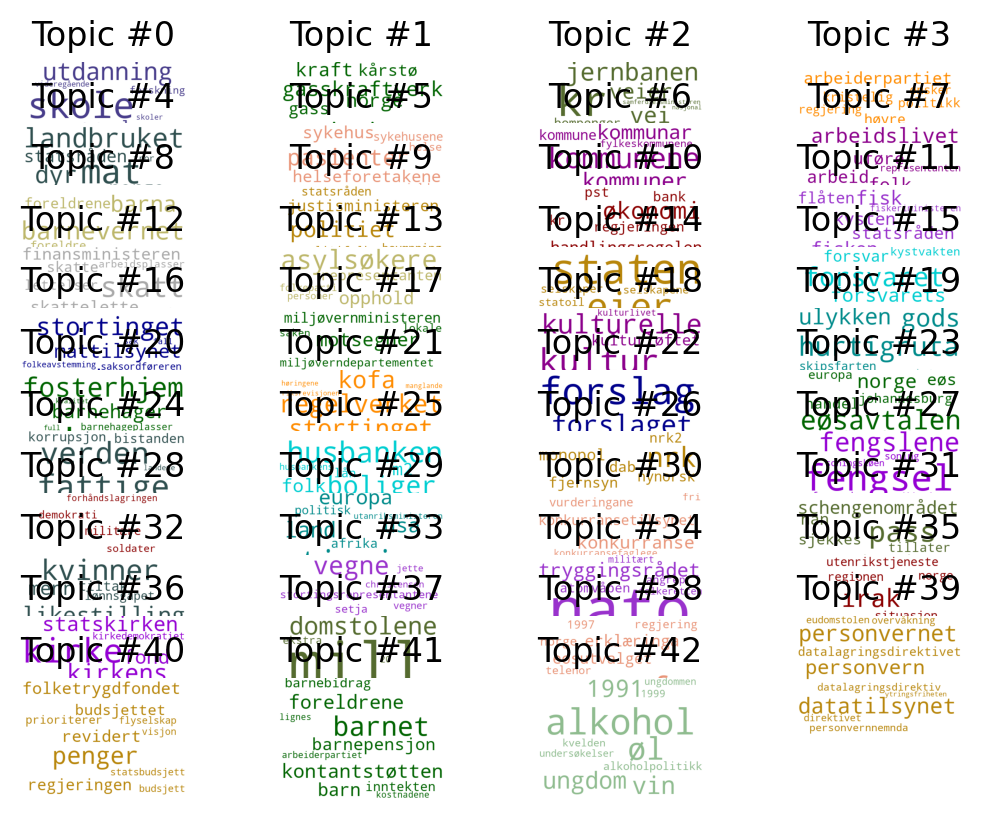

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(formatted_topics, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

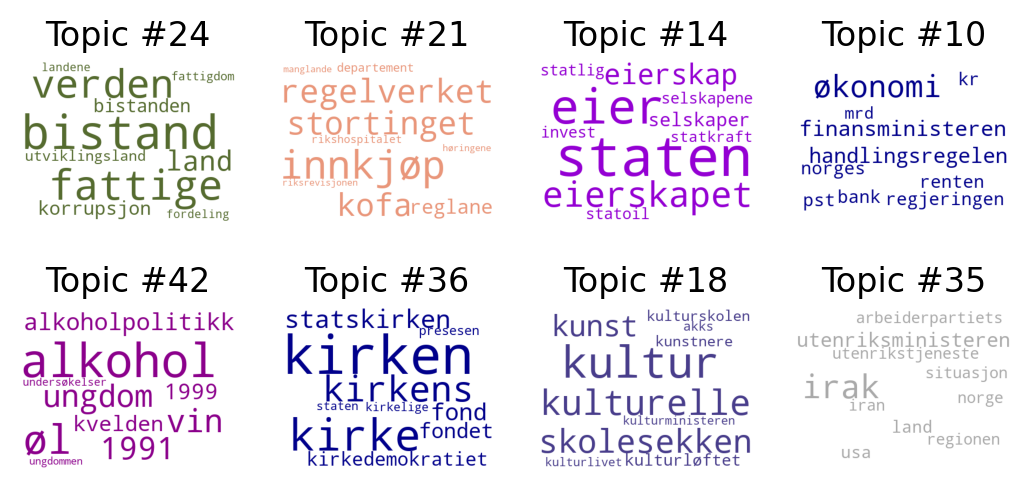

In [15]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [16]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [17]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))



write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [18]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)


In [19]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [20]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('skole', 'skolen') wordtuple
('skole', 'skolen') wordup
736.0 over
122045.0 under
-7.373491709664658 -9.523561956057014 0.7742367555004034 ('skole', 'skolen') 736 385 317
('skolen', 'utdanning') wordtuple
('skolen', 'utdanning') wordup
214.0 over
138600.0 under
-9.339100745510791 -7.7414669864011465 1.2063735157582003 ('skolen', 'utdanning') 214 385 360
('elever', 'skolen') wordtuple
('elever', 'skolen') wordup
345.0 over
66220.0 under
-7.58452683861883 -8.430452551665532 0.8996583270159584 ('elever', 'skolen') 345 385 172
('elevene', 'skolen') wordtuple
('elevene', 'skolen') wordup
401.0 over
59290.0 under
-7.208042749822245 -8.647458426454921 0.8335446548977774 ('elevene', 'skolen') 401 385 154
('lærere', 'skolen') wordtuple
('lærere', 'skolen') wordup
291.0 over
46970.0 under
-7.3345766302368665 -8.184875342908285 0.8961134193194338 ('lærere', 'skolen') 291 385 122
('forskning', 'skolen') wordtuple
('forskning', 'skolen') wordup
132.0 over
104720.0 under
-9.63178335747415 -7.044

In [23]:
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.0008269966327318627


In [24]:
print(diversity)

0.8767441860465116


In [25]:
print(coherence)

1.3280500943804823


In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                    │ Metric    │    Value │
╞══════════════════════════════════════════╪═══════════╪══════════╡
│ bertopic_nb-sbert-base_np_mini_stopwords │ coherence │ 1.32805  │
├──────────────────────────────────────────┼───────────┼──────────┤
│ bertopic_nb-sbert-base_np_mini_stopwords │ diversity │ 0.876744 │
╘══════════════════════════════════════════╧═══════════╧══════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})